In [ ]:
# Manually upload zipped folder and unzip (also renamed it to image-datasets)
!unzip /content/test-ds.zip

In [ ]:
# !rm -r -f train-ds/
# !rm -r -f test-ds/


In [ ]:
!unzip angry_train.zip

Archive:  angry_train.zip
replace angry_test/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: angry_train/00000005.jpg  
  inflating: angry_train/00000012.jpg  
  inflating: angry_train/00000017.jpg  
  inflating: angry_train/00000022.jpg  
  inflating: angry_train/00000030.jpg  
  inflating: angry_train/00000037.jpg  
  inflating: angry_train/00000043.jpg  
  inflating: angry_train/00000049.jpg  
  inflating: angry_train/00000055.jpg  
  inflating: angry_train/00000061.jpg  
  inflating: angry_train/00000068.jpg  
  inflating: angry_train/00000075.jpg  
  inflating: angry_train/00000079.jpg  
  inflating: angry_train/00000081.jpg  
  inflating: angry_train/00000083.jpg  
  inflating: angry_train/00000085.jpg  
  inflating: angry_train/00000086.jpg  
  inflating: angry_train/00000090.jpg  
  inflating: angry_train/00000092.jpg  
  inflating: angry_train/00000093.jpg  
  inflating: angry_train/00000094.jpg  
  inflating: angry_train/00000096.jpg  
  inflating: angry_tr

In [ ]:
!cp -R angry_train train-ds

In [ ]:
!unzip angry_test.zip

In [ ]:
!cp -R angry_test test-ds

In [ ]:
!unzip /content/train-ds.zip

In [ ]:
import requests, re, time
import torch, torchvision

from torch import nn, optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

from torch.utils.mobile_optimizer import optimize_for_mobile

In [ ]:
xform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
# dataset_full = datasets.ImageFolder('/content/image-datasets', transform=xform)

In [ ]:
# In case we need more data:
# yform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomGrayscale(1), transforms.RandomHorizontalFlip(1)])

Labels for angry=0;
happy=1;
sad=2;
sleepy=3


In [ ]:
#n_all = len(dataset_full)
#n_train = int(0.8 * n_all)
#n_test = n_all - n_train
#rng = torch.Generator().manual_seed(906)
dataset_train = datasets.ImageFolder('/content/train-ds', transform=xform)
dataset_test = datasets.ImageFolder('/content/test-ds', transform=xform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(tensor([[[ 0.4824,  0.4902,  0.4902,  ...,  0.1529,  0.0980,  0.0196],
          [ 0.3490,  0.3569,  0.3569,  ...,  0.1451,  0.0902,  0.0118],
          [ 0.1608,  0.1686,  0.1765,  ...,  0.1373,  0.0745,  0.0039],
          ...,
          [-0.0275, -0.0275, -0.0039,  ...,  0.3725,  0.3569,  0.3412],
          [-0.0510, -0.0510, -0.0431,  ...,  0.3725,  0.3490,  0.3176],
          [-0.0588, -0.0667, -0.0667,  ...,  0.3490,  0.3255,  0.2863]],
 
         [[ 0.6000,  0.6078,  0.6078,  ...,  0.2471,  0.2157,  0.1529],
          [ 0.4980,  0.4980,  0.5059,  ...,  0.2392,  0.2078,  0.1529],
          [ 0.3098,  0.3176,  0.3255,  ...,  0.2235,  0.2000,  0.1373],
          ...,
          [-0.0275, -0.0196,  0.0039,  ...,  0.3882,  0.3725,  0.3569],
          [-0.0353, -0.0353, -0.0275,  ...,  0.3882,  0.3647,  0.3333],
          [-0.0431, -0.0510, -0.0510,  ...,  0.3647,  0.3412,  0.3020]],
 
         [[ 0.6863,  0.6863,  0.6941,  ...,  0.3020,  0.2863,  0.2314],
          [ 0.5922,  0.5922,

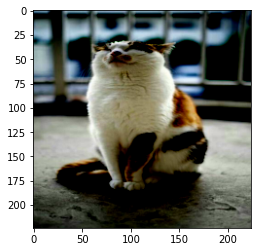

In [ ]:
plt.imshow(dataset_train[243][0].permute(1,2,0))
dataset_train[243]

In [ ]:
dataset_train[0][1]

0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


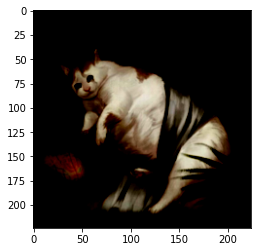

In [ ]:
# Checking contents:
plt.imshow(dataset_train[560][0].permute(1,2,0))

In [ ]:
dataset_train[560]

(tensor([[[-0.9216, -0.9216, -0.9216,  ..., -0.9059, -0.9216, -0.8980],
          [-0.9216, -0.9216, -0.9216,  ..., -0.9137, -0.9216, -0.9137],
          [-0.9216, -0.9216, -0.9216,  ..., -0.9137, -0.9216, -0.9216],
          ...,
          [-0.8588, -0.9529, -0.9529,  ..., -0.9294, -0.9373, -0.9373],
          [-0.8588, -0.9608, -0.9686,  ..., -0.9451, -0.9451, -0.9529],
          [-0.7412, -0.9686, -0.9608,  ..., -0.9451, -0.9451, -0.9529]],
 
         [[-0.9451, -0.9451, -0.9451,  ..., -0.9216, -0.9137, -0.8902],
          [-0.9451, -0.9451, -0.9451,  ..., -0.9216, -0.9137, -0.9059],
          [-0.9451, -0.9451, -0.9451,  ..., -0.9137, -0.9137, -0.9137],
          ...,
          [-0.8510, -0.9451, -0.9451,  ..., -0.9216, -0.9294, -0.9294],
          [-0.8510, -0.9529, -0.9608,  ..., -0.9373, -0.9373, -0.9451],
          [-0.7412, -0.9608, -0.9608,  ..., -0.9373, -0.9373, -0.9451]],
 
         [[-1.0000, -1.0000, -1.0000,  ..., -0.9608, -0.9608, -0.9294],
          [-1.0000, -1.0000,

0 -> angry
1 -> happy
2 -> sad

In [ ]:
dataset_test[62][0].shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


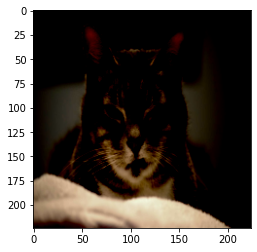

In [ ]:
# Checking contents:
plt.imshow(dataset_test[46][0].permute(1,2,0))

In [ ]:
#dataset_test_correctlabel=[(sample,label-1) for sample,label in dataset_test]
#dataset_train_correctlabel=[(sample,label-1) for sample,label in dataset_train]

In [ ]:
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 4, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = 4, shuffle=True)

In [ ]:
model = models.resnet18(pretrained=True)

In [ ]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
model.fc = nn.Linear(model.fc.in_features, 2)
torch.nn.init.xavier_uniform_(model.fc.weight)

Parameter containing:
tensor([[-0.0969,  0.1077, -0.0789,  ...,  0.0443,  0.0078, -0.0521],
        [-0.0794,  0.0150, -0.0524,  ...,  0.0339, -0.0407,  0.0268]],
       requires_grad=True)

In [ ]:
torch.cuda.device_count()

1

In [ ]:
device = torch.device('cuda')
model = model.to(device)

In [ ]:
# Created class that takes learning rate, momentum factor, learning rate scheduler, and minibatch size to easily change variables and experiment for Task 5
class TransferLearning:


   def __init__(self, learning_rate, momentum_factor, learning_rate_scheduler, minibatch_size, stepSize):
     self.criterion = nn.CrossEntropyLoss()
     self.optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
     self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=stepSize, gamma=learning_rate_scheduler)
     self.loss_test = 0;
     self.epoch_num = 0;
  
   def run_test(self, model):
     nsamples_test = len(dataset_test)
     loss, correct = 0, 0
     model.eval()
     with torch.no_grad():
         for samples, labels in loader_test:
             samples = samples.to(device)
             labels = labels.to(device)
             outs = model(samples)
             loss += self.criterion(outs, labels)
             _, preds = torch.max(outs.detach(), 1)
             correct_mask = preds == labels
             correct += correct_mask.sum(0).item()
     return loss / nsamples_test, correct / nsamples_test

   def run_train(self, model):
     nsamples_train = len(dataset_train)
     loss_sofar, correct_sofar = 0, 0
     model.train()
     with torch.enable_grad():
         for samples, labels in loader_train:
             samples = samples.to(device)
             labels = labels.to(device)
             self.optimizer.zero_grad()
             outs = model(samples)
             _, preds = torch.max(outs.detach(), 1)
             loss = self.criterion(outs, labels)
             loss.backward()
             self.optimizer.step()
             loss_sofar += loss.item() * samples.size(0)
             correct_sofar += torch.sum(preds == labels.detach())
     self.scheduler.step()
     return loss_sofar / nsamples_train, correct_sofar / nsamples_train

   def run_all(self, model, n_epochs):
     for epoch in range(n_epochs):
         loss_train, acc_train = self.run_train(model)
         self.loss_test, acc_test = self.run_test(model)
         print(f"epoch {self.epoch_num + epoch}: train loss {loss_train:.4f} acc {acc_train:.4f}, test loss {self.loss_test:.4f} acc {acc_test:.4f}")
     self.epoch_num = self.epoch_num + n_epochs

In [ ]:
# accuracy without training
learn = TransferLearning(0.0001, 0.8, 0.001, 32 , 0.01)
# learn.run_test(model)

In [ ]:
#learn.run_all(model, 1)
prev_loss = learn.loss_test

while True:
  learn.run_all(model, 1)
  loss_difference = prev_loss - learn.loss_test
  if (learn.epoch_num > 3):
    break
  prev_loss = learn.loss_test

RuntimeError: ignored

In [ ]:
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 1, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = 1, shuffle=True)

In [ ]:
  learn.run_all(model, 1)

Optimizing Parameters:

* Top section of the table contains optimized parameters that are compatible with our app integration model

* Bottom section of the table contains overall optimized parameters (not necessarily compatible with app)

| learning rate | momentum | step size | gamma | minibatch | test loss | test acc | best epoch |
|---------------|----------|-----------|-------|-----------|-----------|----------|------------|
| ...           | ...      | ...       | ...   | ...       | ...       | ...      | ...        |
| **0.0005** | **0.9** | **8** | **0.1** | 1 | 0.2718  | 0.7035| 14
| **0.0005** | **0.9** | **8** | 0.9 | 1 | 0.3730  | 0.6504| 10
| **0.0005** | **0.9** | **8** | 0.5 | 1 | 0.3148  | 0.6770| 9
| **0.0005** | **0.9** | 4 | 0.1 | 1 | 0.2684  | 0.6504| 10
| **0.0005** | **0.9** | 12 | 0.1 | 1 | 0.3088  | 0.6726| 17
| **0.0005** | **0.9** | 10 | 0.1 | 1 | 0.3179  | 0.6681| 19
| **0.0005** | **0.9** | 5 | 0.1 | 1 | 0.2794  | 0.6637| 16
| **0.0005** | 0.5 | **8** | 0.1 | 1 | 0.2414  | 0.6593 | 6
| **0.0005** | 0.2 | **8** | 0.1 | 1 | 0.2622  | 0.6239 | 13
| 0.005 | **0.9** | **8** | 0.1 | 1 | 0.4175  | 0.4248 | 10
| 0.01 | **0.9** | **8** | 0.1 | 1 | 0.3620  | 0.3850 | 12
| 0.000001 | **0.9** | **8** | 0.1 | 1 | 0.3788 | 0.3496 | 12
| 0.1 | **0.9** | **8** | 0.1 | 1 | 0.3922 | 0.3142 | 19
| 0.001 | **0.9** | **8** | 0.1 | 1 | 0.3316 | 0.6549 | 11
| ... | ... | ... | ... | ... | ... | ... | ... |
| 0.001 | 0.9 | 8 | 0.1 | 5 | 0.3408 | 0.6637 | 20
| 0.1 | 0.9 | 8 | 0.1 | 5 | 0.3492 | 0.4027 | 12
| 0.000001 | 0.9 | 8 | 0.1 | 5 | 0.4359 | 0.3363 | 20
| 0.01 | 0.9 | 8 | 0.1 | 5 | 0.3217 | 0.4292 | 20
| 0.005 | 0.9 | 8 | 0.1 | 5 | 0.3417 | 0.4381 | 8
| **0.0005** | 0.5 | 8 | 0.1 | 5 | 0.2521 | 0.6062 | 11
| **0.0005** | 0.2| 8 | 0.1 | 5 | 0.2577 | 0.6239 | 14
| **0.0005** | 0.8| 8 | 0.1 | 5 | 0.2682 | 0.6681 | 11
| **0.0005** | **0.9** | 5 | 0.1 | 5 | 0.3160 | 0.6549 | 19
| **0.0005** | **0.9** | 10 | 0.1 | 5 | 0.2862 | 0.6858 | 14
| **0.0005** | **0.9** | 12 | 0.1 | 5 | 0.3171 | 0.6637 | 16
| **0.0005** | **0.9** | **8** | 0.5 | 5 | 0.3367 | 0.6726 | 17
| **0.0005** | **0.9** | **8** | 0.9 | 5 | 0.3137 | 0.6504 | 11
| **0.0005** | **0.9** | **8** | **0.1** | 5 | 0.2966 | 0.6903 | 20
| **0.0005** | **0.9** | **8** | **0.1** | 8 | 0.3185 | 0.6549 | 14
| **0.0005** | **0.9** | **8** | **0.1** | 3 | 0.2908 | 0.6814 | 11
| **0.0005** | **0.9** | **8** | **0.1** | 2 | 0.2872 | 0.6504 | 10
| **0.0005** | **0.9** | **8** | **0.1** | **4** | 0.2834 | 0.7168 | 20


May use transforms.Rotation/VerticalFlip/... 

In [ ]:
# Code taken from tutorial video at https://www.youtube.com/watch?v=5Lxuu16_28o&ab_channel=PyTorch

# model.qconfig = torch.quantization.get_default_qconfig('qnnpack')

In [ ]:
# torch.quantization.prepare(model,inplace=True)

In [ ]:
# def calibrate(model,calibration_data):
#   return
# calibrate(model, [])

In [ ]:
# model_quant = torch.quantization.QuantStub()

In [ ]:
# model = torch.quantization.convert(model_quant,inplace=True)

- cpu_model = gpu_model.cpu()
- sample_input_cpu = sample_input_gpu.cpu()
- traced_cpu = torch.jit.trace(traced_cpu, sample_input_cpu)
- torch.jit.save(traced_cpu, "cpu.pth")

In [ ]:
 model.eval()


In [ ]:
cpu_model = model.cpu()
example = torch.rand(1, 3, 224, 224)
traced_cpu = torch.jit.trace(cpu_model, example)
torch.jit.save(traced_cpu, "cpu_model.pt")

In [ ]:
cpu_model = model.cpu()
torchscript_model = torch.jit.script(cpu_model)
torch.jit.save(torchscript_model, "cpu_model_9may130.pt")

In [ ]:
# torchscript_model_optimized = optimize_for_mobile(torchscript_model)

In [ ]:
# # example = torch.rand(1, 3, 224, 224)
# traced_script_module = torch.jit.script(model)
# traced_script_module.save("model.pt")

In [ ]:
# example

In [ ]:
# torch.jit.save(torchscript_model_optimized, 'image_model.pt')

In [ ]:
 i = 0
 for samples,labels in loader_test:
   s = (samples)
   l = labels
   #samples = samples.to(device)
   s = samples
   out = torchscript_model(samples)
   
   i+= 1
   if i == 24:
     break

In [ ]:
 out

In [ ]:
# model.eval()

In [ ]:
 s[0][0][0]

In [ ]:
plt.imshow(s[0].permute(1,2,0))

In [ ]:
 l

In [ ]:
# s.shape

In [ ]:
# out.shape

In [ ]:
t,p = torch.max(out,1)

In [ ]:
# t.shape

In [ ]:
p.shape

In [ ]:
# p.to(device)

In [ ]:
torch.sum(p== l)

In [ ]:
out = model(s)

In [ ]:
out

In [ ]:
out.detach()